In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('DataSet/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data
### Using seaborn to create a heatmap to see where are the missing data

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

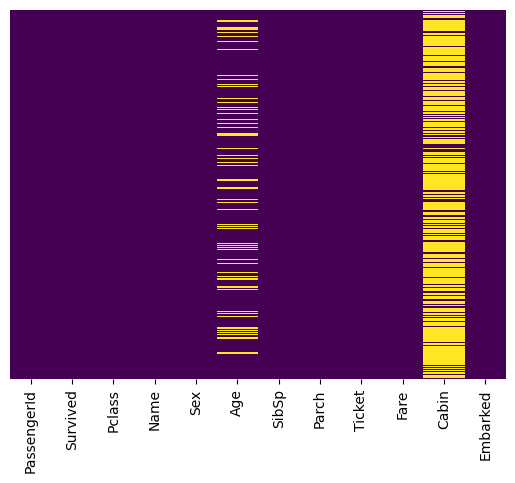

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Roughly 20% of the Age data is missing .The proportion of the Age is missing is likely small enough for reasonable replacement with some form of imputation.

Looking at the Cabin column it looks like we are just missing too much of that data to do something useful with at  a basic level 

<AxesSubplot:xlabel='Survived', ylabel='count'>

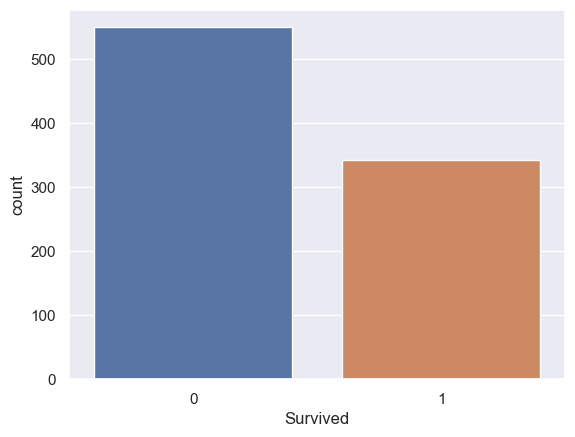

In [22]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', data = train)

In [8]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

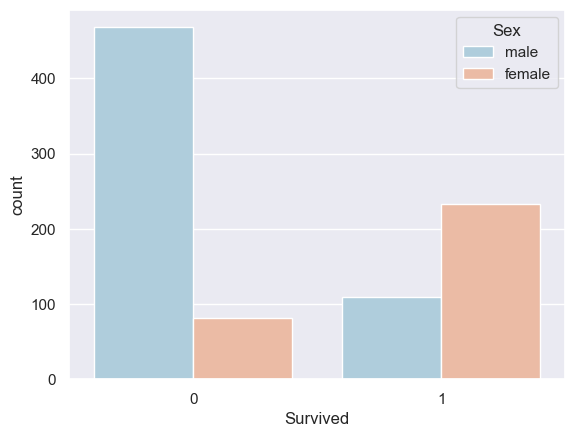

In [19]:
sns.set_theme(style='darkgrid')
sns.countplot(x='Survived', hue='Sex', data = train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

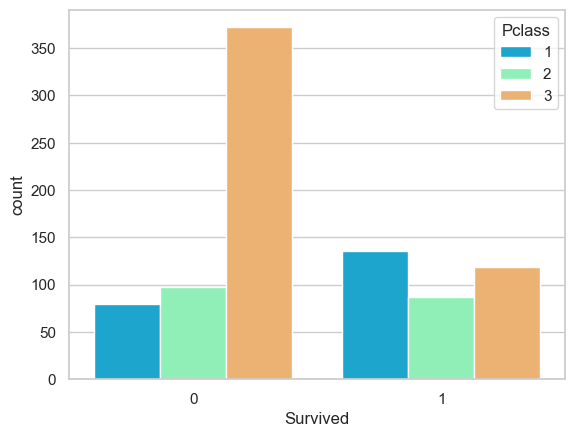

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data = train, palette='rainbow')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

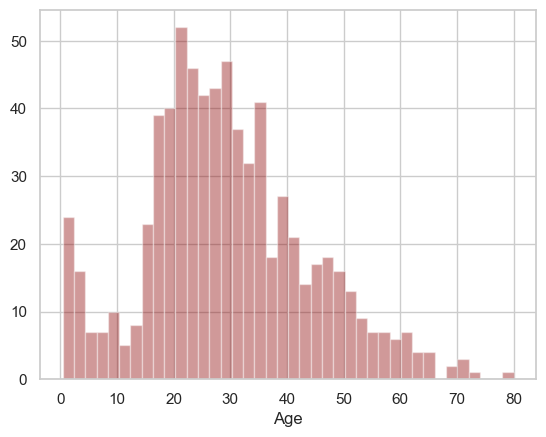

In [34]:
sns.distplot(train['Age'].dropna(), bins = 40, kde = False, color = 'darkred')

Text(0.5, 0, 'Age')

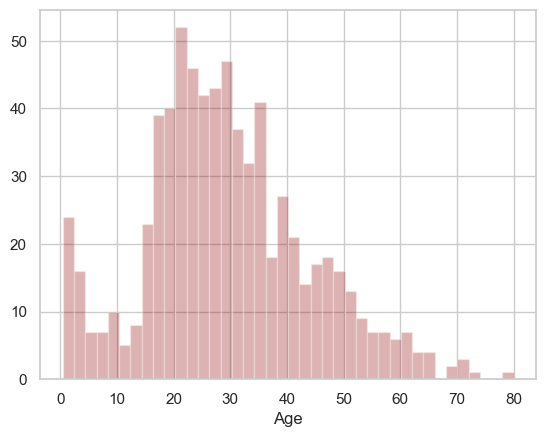

In [38]:
train['Age'].hist(bins = 40, color = 'darkred', alpha = 0.3)
plt.xlabel('Age')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

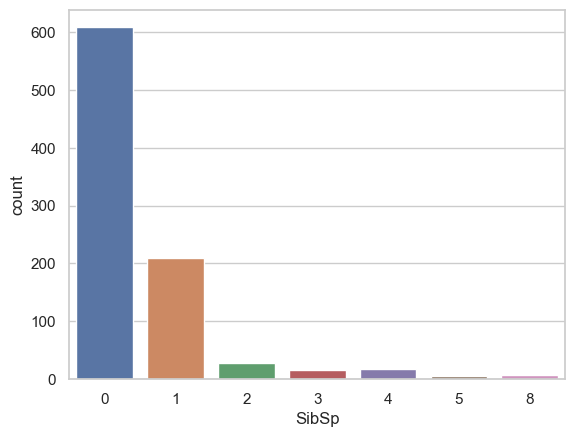

In [39]:
sns.countplot(x='SibSp', data=train)

Text(0.5, 0, 'Fare')

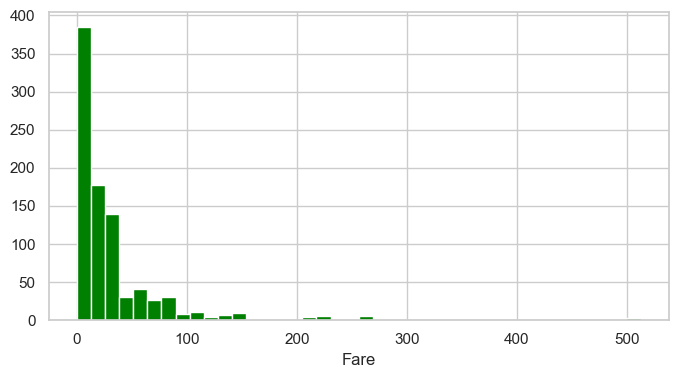

In [46]:
train['Fare'].hist(bins=40, color= 'green', figsize=(8,4))
plt.xlabel('Fare')

# Data Cleaning

Fill the missing age data instead of dropping the rows which is null.
One way to do this is by filling the missing age data with mean Age of the passengers.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

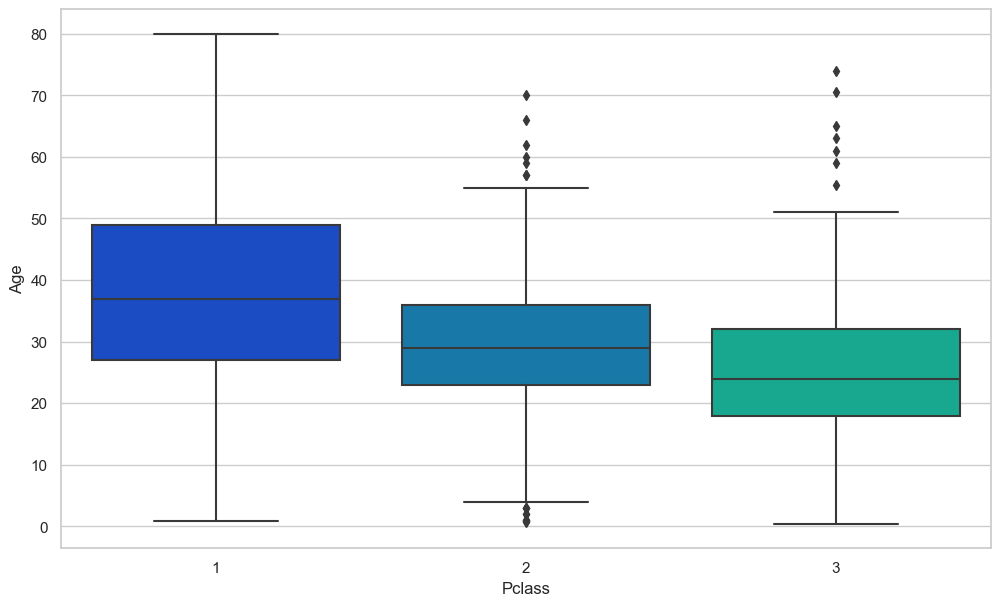

In [47]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette='winter')

We could see the wealthier passengers in the Higher classes tend to be older, which makes sence.We'll use these average age values to impulse based on Pclass for Age

In [48]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [49]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

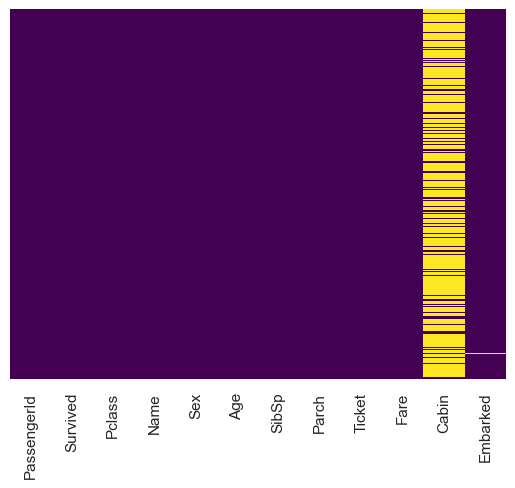

In [50]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Dropping the Cabin column


In [53]:
train.drop('Cabin', axis=1, inplace=True)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

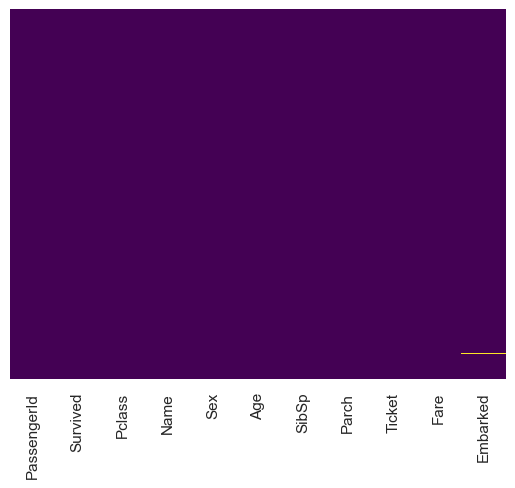

In [59]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [60]:
train.dropna(inplace=True)

## Converting Categorical Features
Converting categorical features to dummy variables using pandas.Otherwise our machine learning algorithm wont be able to directly take in those feartures as inputs.

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [62]:
pd.get_dummies(train['Embarked'], drop_first = True,).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [63]:
sex = pd.get_dummies(train['Sex'], drop_first = True )
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [64]:
train.drop(['Sex', 'Embarked', 'Ticket', 'Name'], axis = 1, inplace=True)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [66]:
train = pd.concat([train, sex, embark], axis = 1)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Our data is ready for Model
### Building a Logistic Regression Model
Let's start by splitting our data into a training set and test set 

#### Train Test Split

In [68]:
train.drop('Survived', axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [69]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1),
                                                   train['Survived'], test_size = 0.30,
                                                   random_state=101)

## Training and Predicting

In [76]:
from sklearn.linear_model import LogisticRegression

In [80]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [81]:
predictions = logmodel.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
accuracy = confusion_matrix(y_test, predictions)

In [84]:
accuracy

array([[148,  15],
       [ 32,  72]], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8239700374531835

In [87]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)